In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [77]:
def close_dilate(img_thresh):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    close = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel, iterations=1)
    dilate = cv2.dilate(close, kernel, iterations=2)
    return dilate

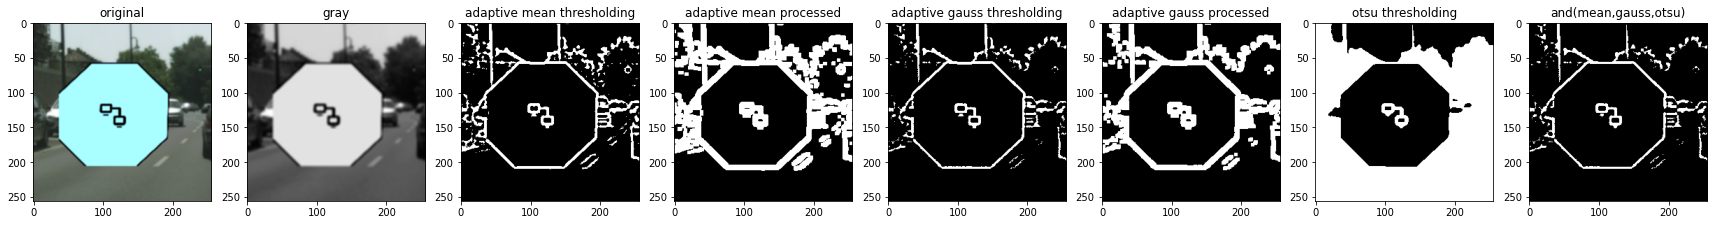

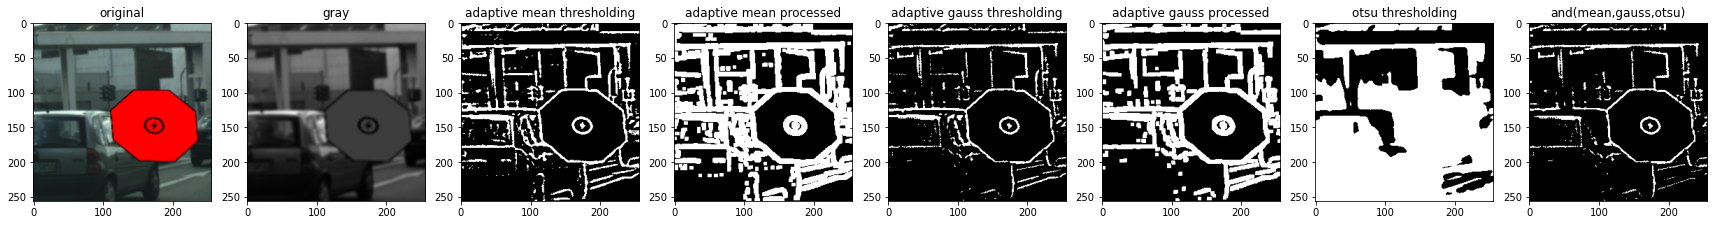

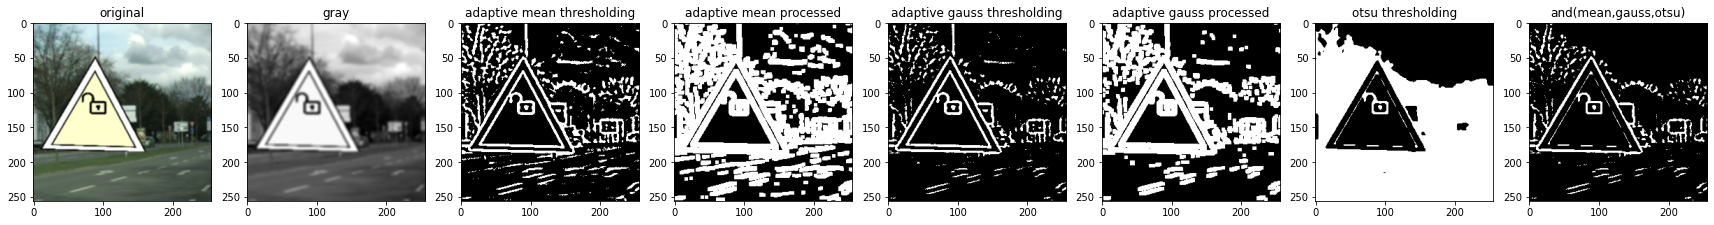

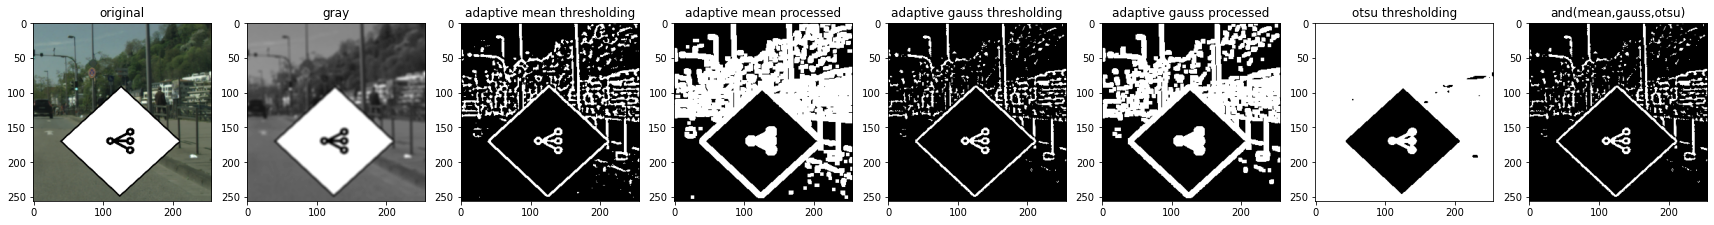

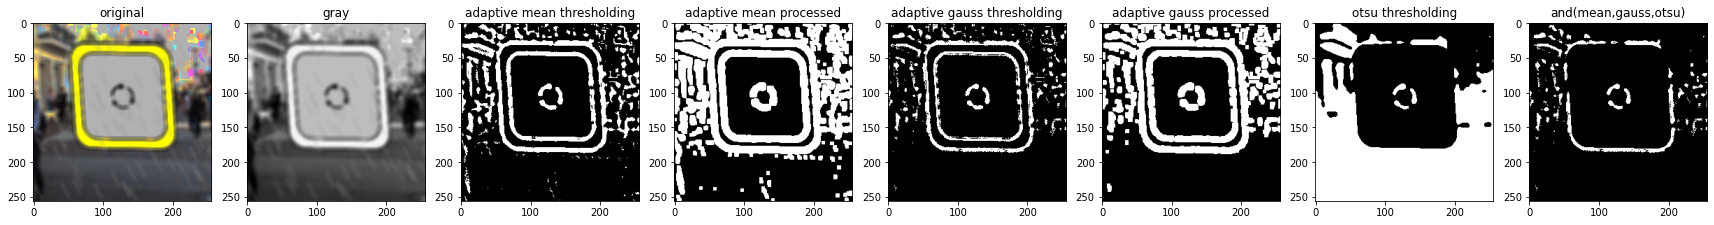

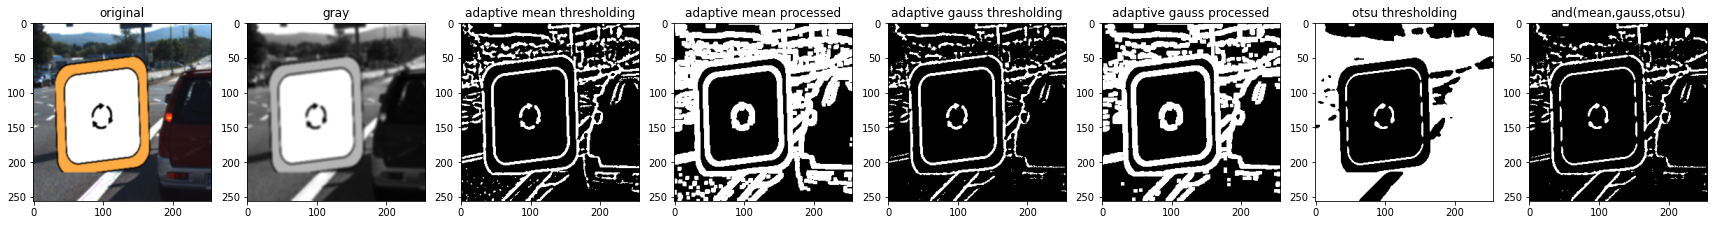

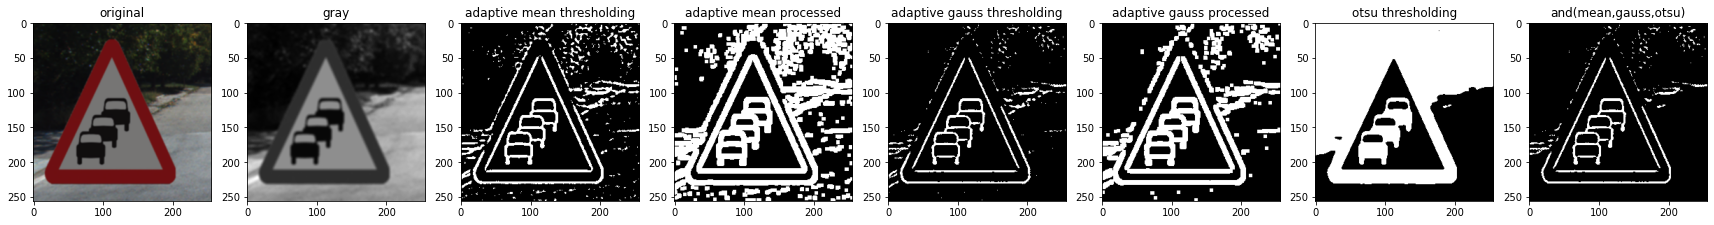

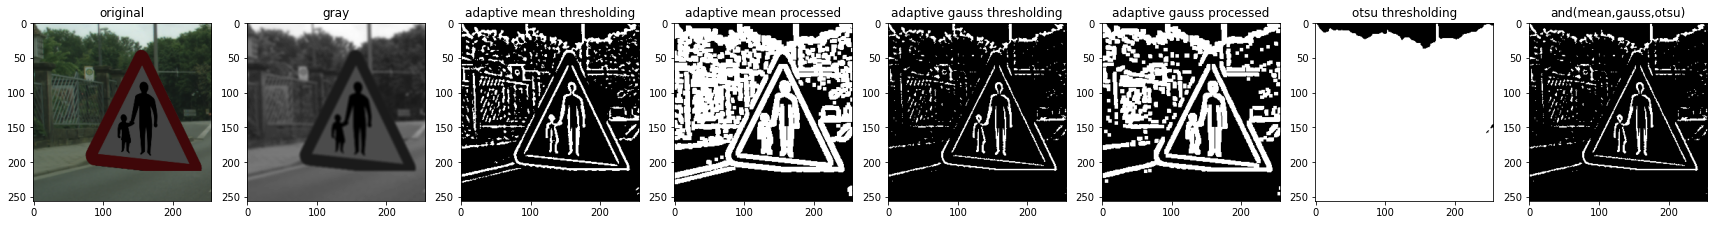

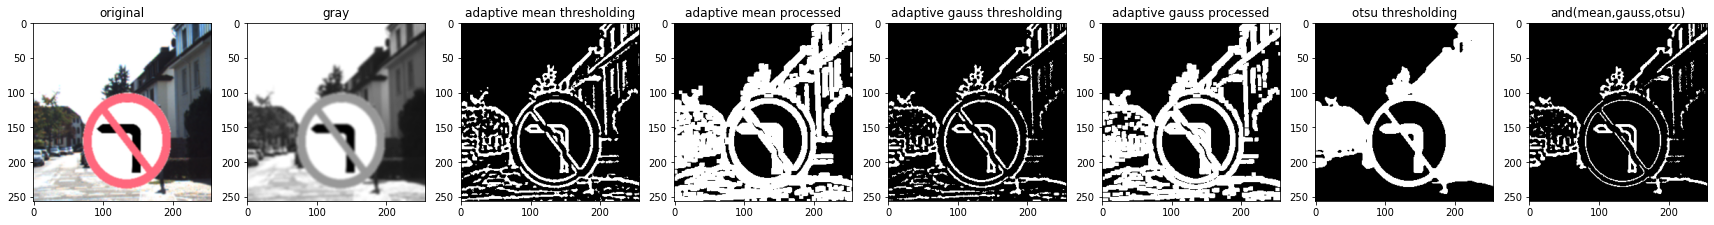

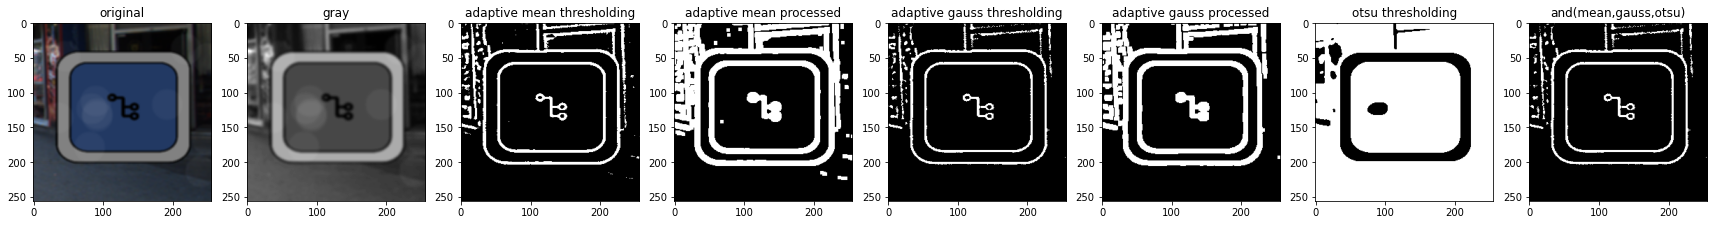

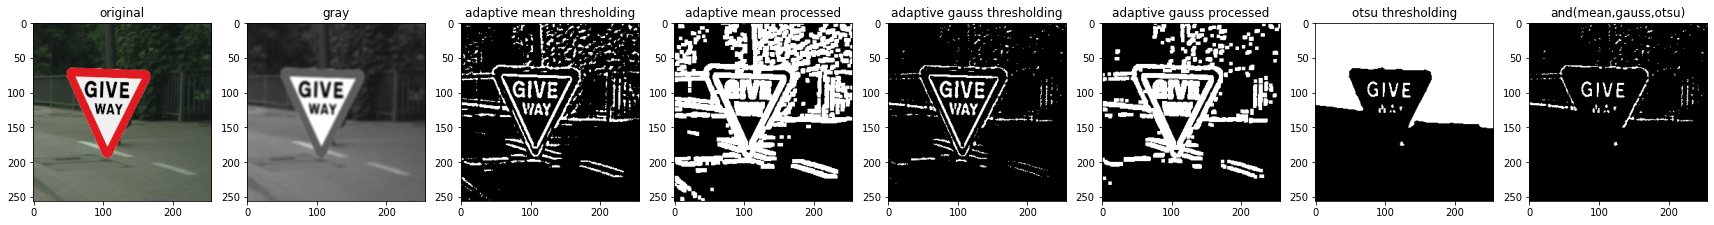

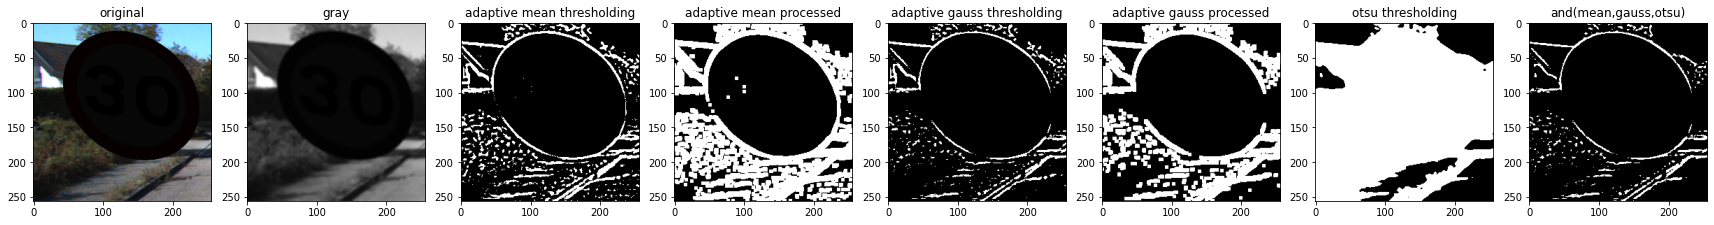

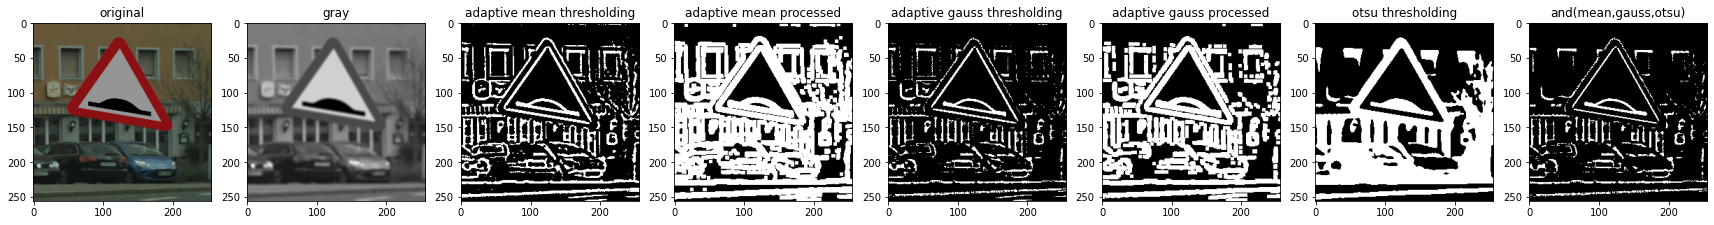

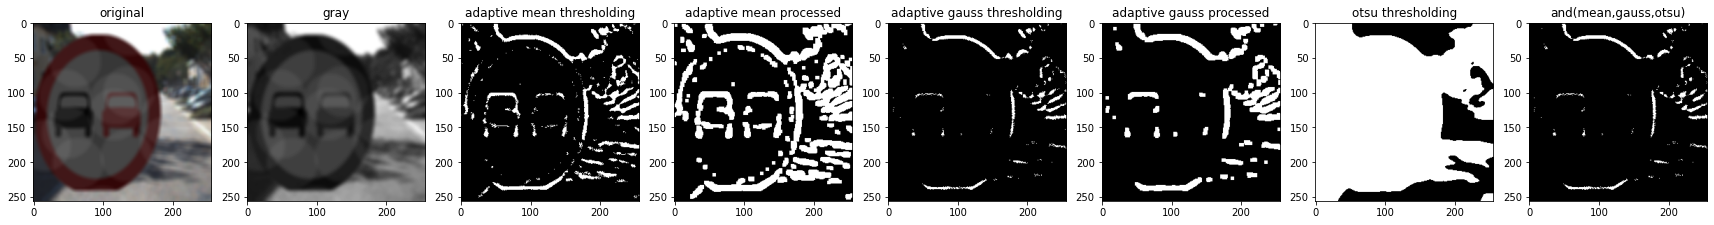

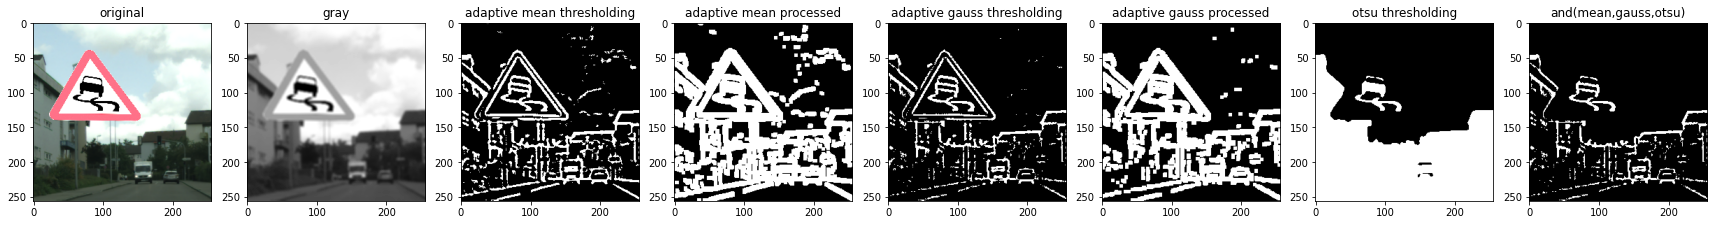

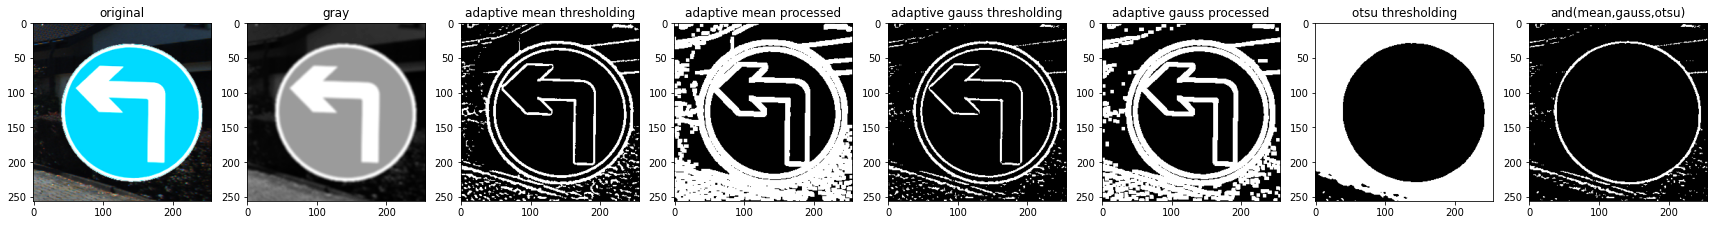

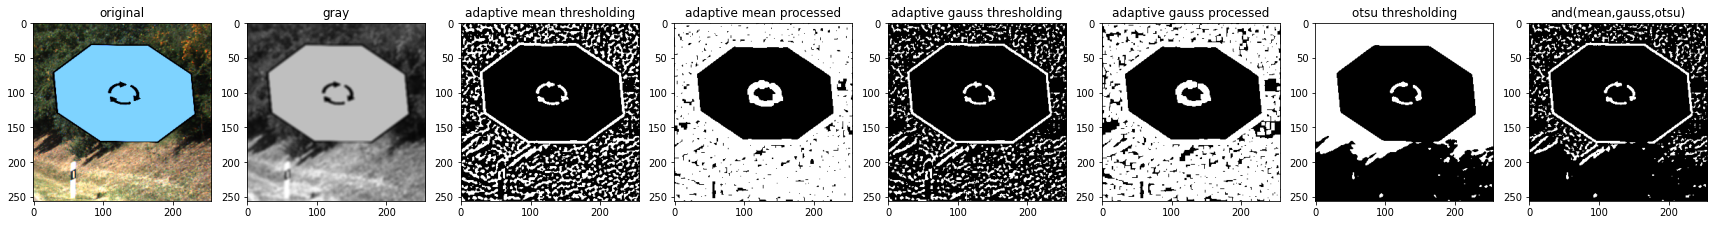

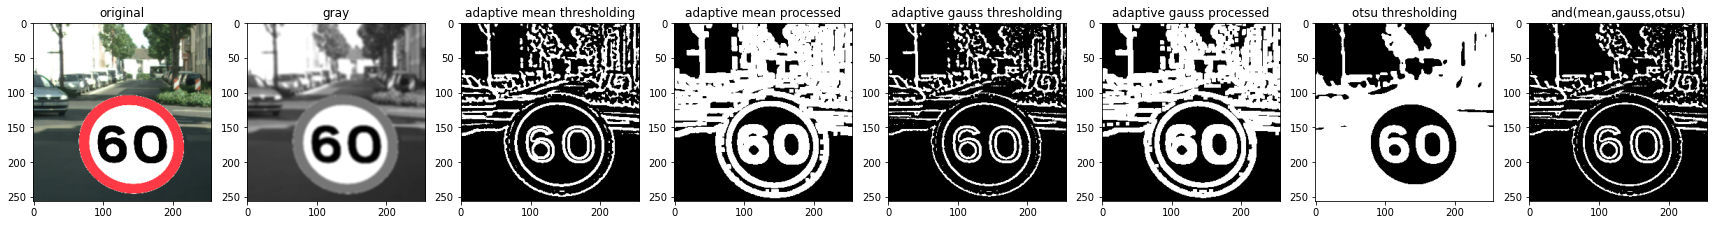

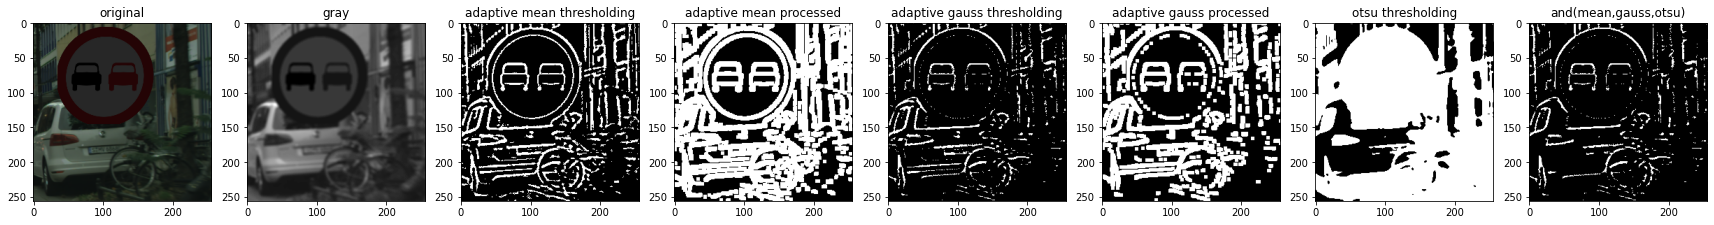

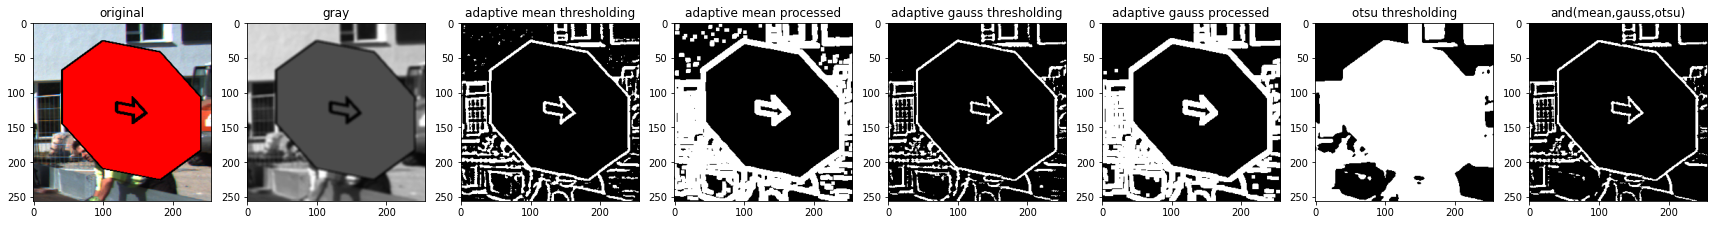

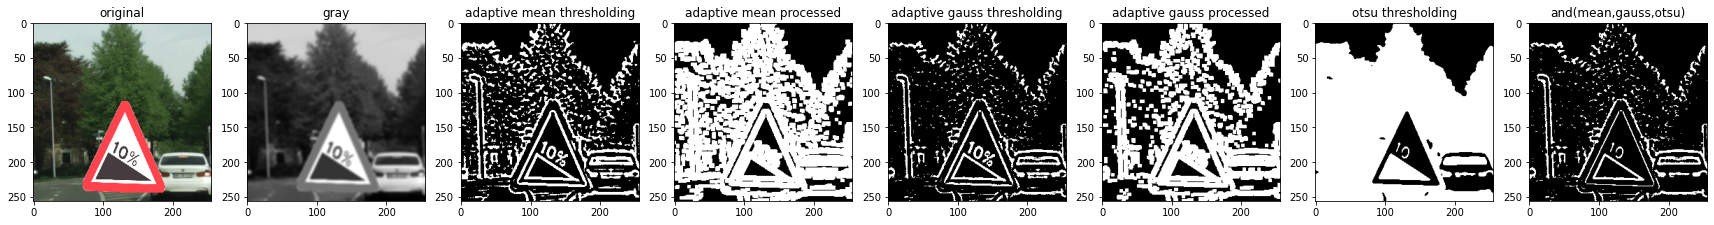

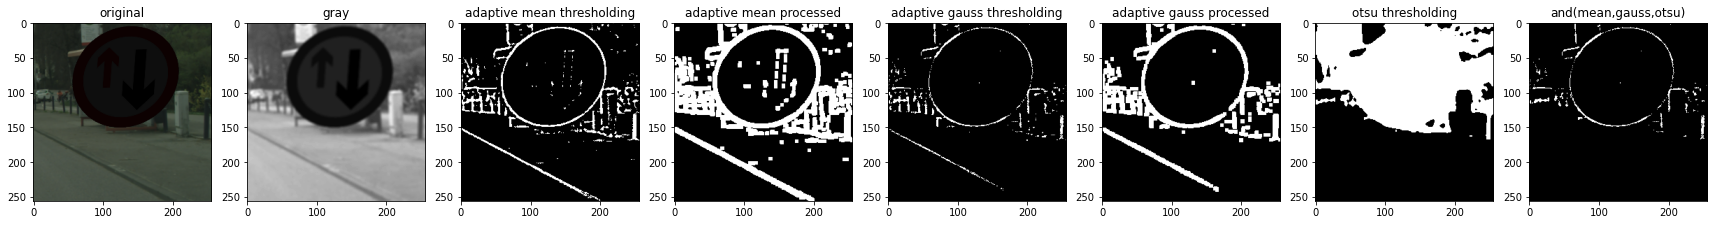

In [83]:
n = 8
for i in range(1, 23):
    image = cv2.imread(f'data_contour_detection/image ({i}).png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30, 6)).patch.set_color('white')
    plt.subplot(1, n, 1)
    plt.imshow(image)
    plt.title('original')

    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 2)
    plt.subplot(1, n, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('gray')
    
    adaptive_mean = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,5,2)
    plt.subplot(1, n, 3)
    plt.imshow(adaptive_mean, cmap='gray')
    plt.title('adaptive mean thresholding')
    
    adaptive_mean_proc = close_dilate(adaptive_mean)
    plt.subplot(1, n, 4)
    plt.imshow(adaptive_mean_proc, cmap='gray')
    plt.title('adaptive mean processed')
    
    adaptive_gauss = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,5,2)
    plt.subplot(1, n, 5)
    plt.imshow(adaptive_gauss, cmap='gray')
    plt.title('adaptive gauss thresholding')
    
    adaptive_gauss_proc = close_dilate(adaptive_gauss)
    plt.subplot(1, n, 6)
    plt.imshow(adaptive_gauss_proc, cmap='gray')
    plt.title('adaptive gauss processed')
    
    _, otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    plt.subplot(1, n, 7)
    plt.imshow(otsu, cmap='gray')
    plt.title('otsu thresholding')
    
    bitwise_and = np.bitwise_and(adaptive_mean, adaptive_gauss)
    bitwise_and = np.bitwise_and(bitwise_and, otsu)
    plt.subplot(1, n, 8)
    plt.imshow(bitwise_and, cmap='gray')
    plt.title('and(mean,gauss,otsu)')
    
    plt.show()